# FINAL PROJECT: 

## Introduction

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## Import Libraries

Install dan import libraries yang digunakan.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [3]:
mpl.style.use(['ggplot'])

## Data Loading

In [4]:
data = pd.read_csv('C:/Kuliah/Studi Independen/weatherAUS.csv')

Memanggil bagian kepala data.

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Memanggil bagian ekor data.

In [6]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Mengecek dimensi data.

In [7]:
data.shape

(145460, 23)

Dari hasil diatas terdapat 145.460 baris data dan 23 kolom data

Mengecek info dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Mengecek tipe data apa saja yg ada pada variabel.

In [9]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Terdapat 6 variabel bertipe object dan sisanya float

Statistik Deskriptif.

In [10]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


Mengecek atribut data.

In [12]:
data.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [13]:
data.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [14]:
data.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [15]:
data.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [16]:
data.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [17]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [18]:
data['RainTomorrow'].value_counts()/len(data)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

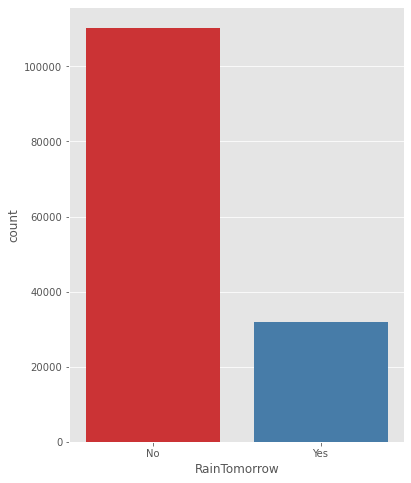

In [19]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

Dari hasil diatas, pada variabel 'Rain Tomorrow' untuk atribut No muncul sebanyak 75.83 % kali dan atribut Yes sebesar 21.9% kali

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [20]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [21]:
data.duplicated().value_counts()

False    145460
dtype: int64

dari hasil plot di atas menunjukkan bahwa variabel 'No' memiliki 110316 data, dan variabel 'Yes' memiliki 31877 data.

In [22]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Hasil diatas menunjukkan bahwa banyak terdapat data yang masih kosong pada seluruh variabel kecuali 'Date' dan 'Location'

No     110319
Yes     31880
Name: RainToday, dtype: int64


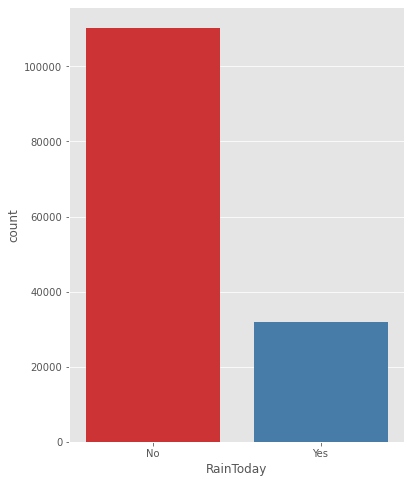

In [23]:
fig, ax = plt.subplots(figsize=(6, 8))
print(data.RainToday.value_counts())
ax = sns.countplot(x="RainToday", data=data, palette="Set1")
plt.show()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


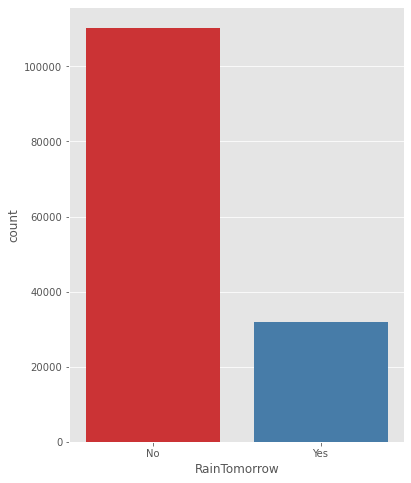

In [24]:
fig, ax = plt.subplots(figsize=(6, 8))
print(data.RainTomorrow.value_counts())
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


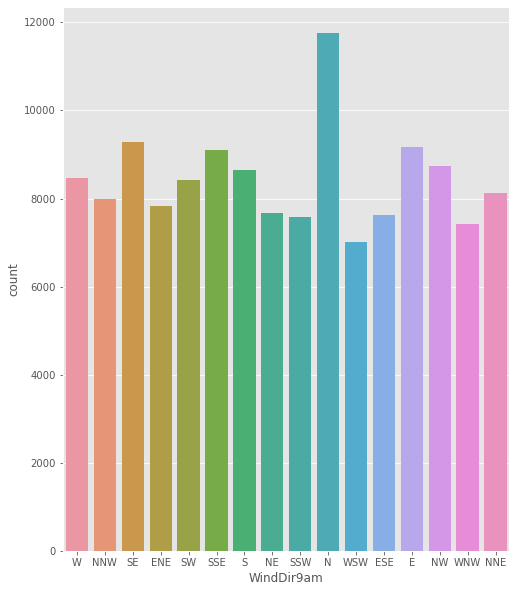

In [25]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindDir9am.value_counts())
ax = sns.countplot(x="WindDir9am", data=data)
plt.show()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


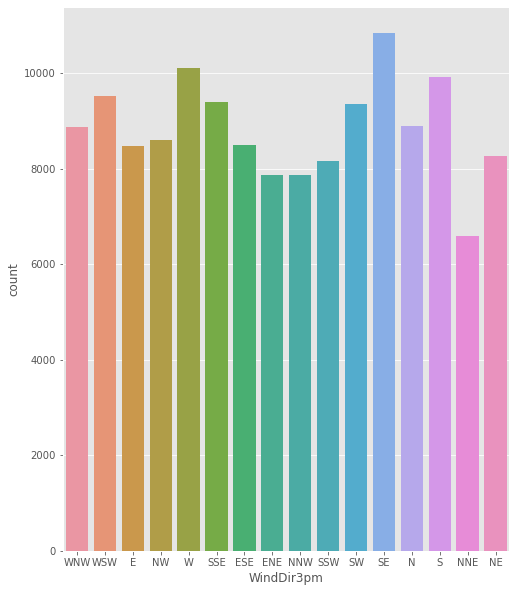

In [26]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindDir3pm.value_counts())
ax = sns.countplot(x="WindDir3pm", data=data)
plt.show()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


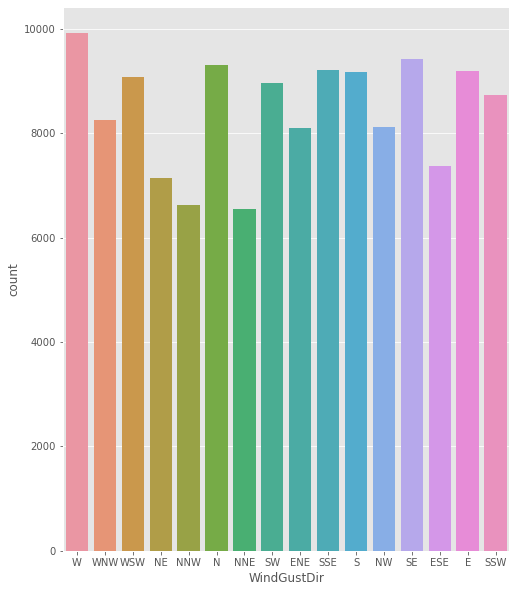

In [27]:
fig, ax = plt.subplots(figsize=(8, 10))
print(data.WindGustDir.value_counts())
ax = sns.countplot(x="WindGustDir", data=data)
plt.show()

## Data Exploration

In [28]:
num_col = data.select_dtypes(include=np.number).columns.to_list()
len(num_col)

16

Mengecek Outlier

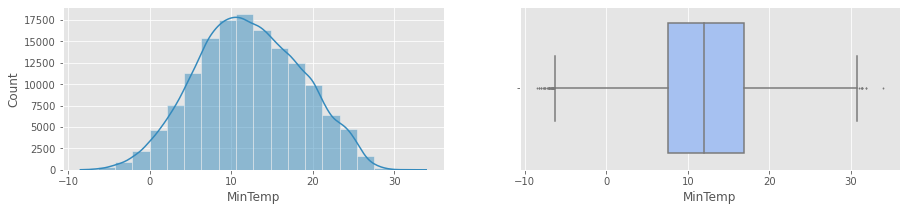

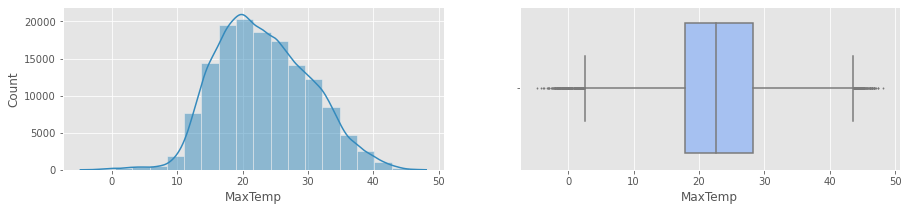

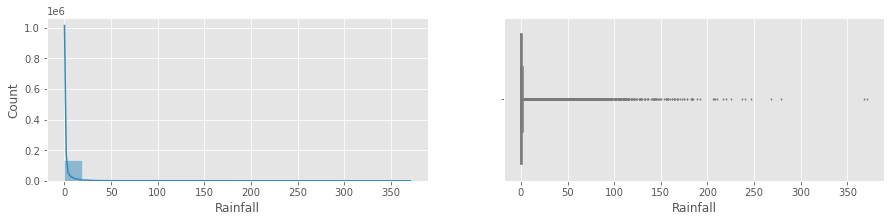

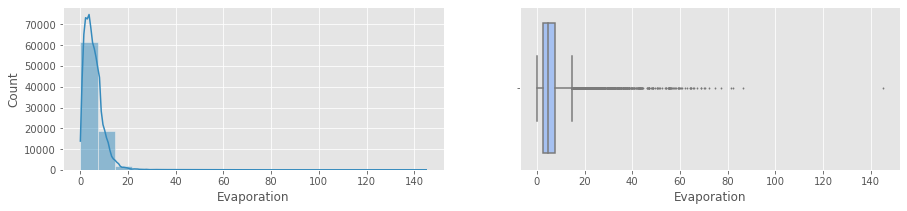

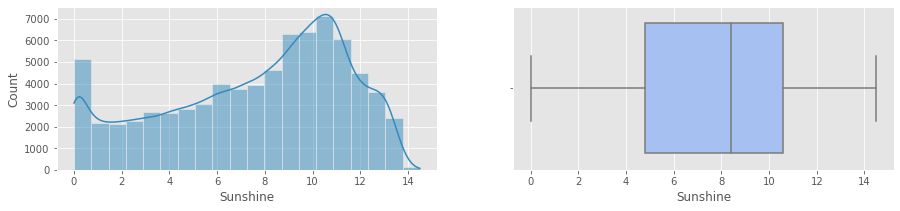

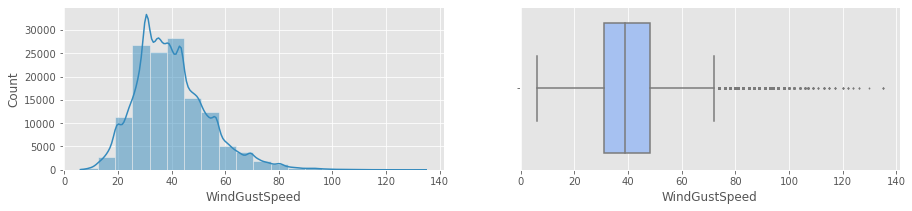

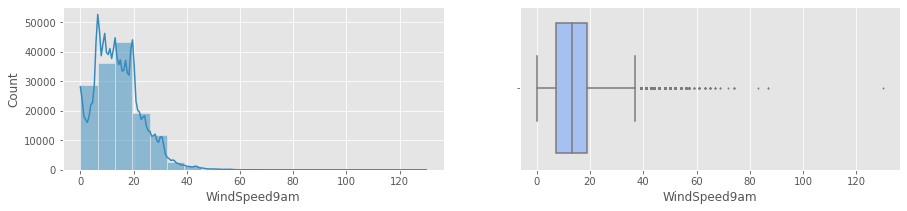

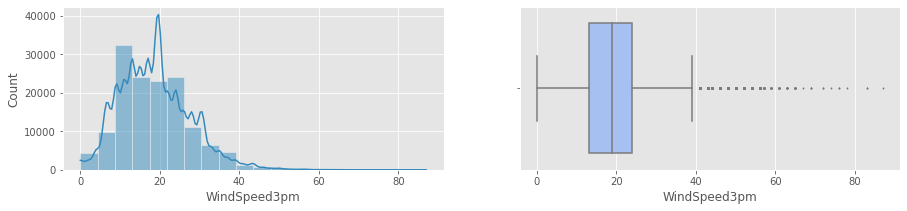

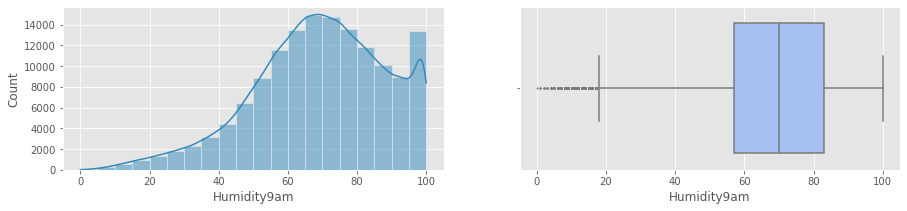

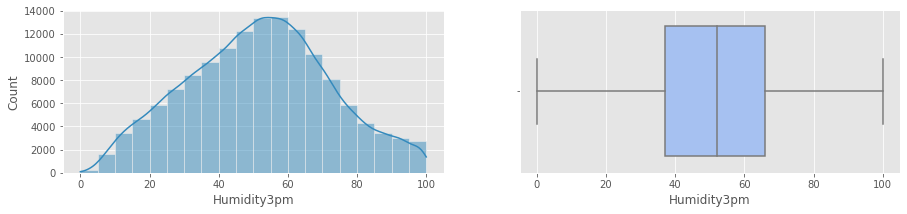

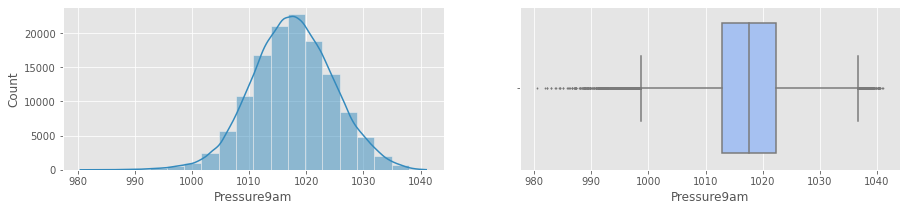

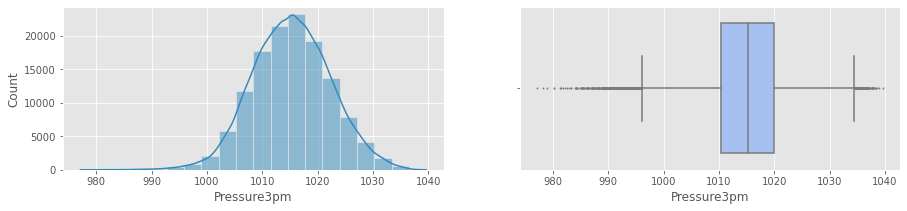

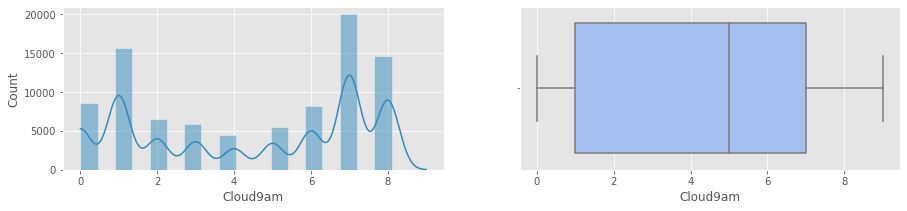

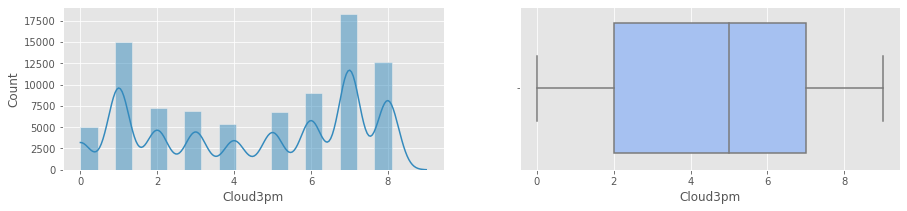

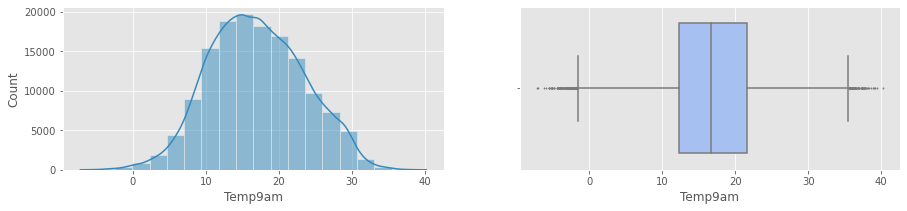

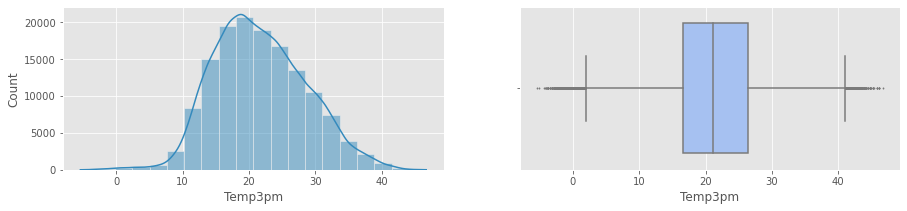

In [29]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

### Menghapus kolom yang tidak dibutuhkan.

Untuk memprediksi model tidak diperlukan kolom mengenai tanggal dan waktu kolom 'Date' dihapus

In [30]:
data2 = data.drop(['Date'],axis=1)

In [31]:
data2 = data2.drop(['Rainfall'], axis=1)

In [32]:
le = preprocessing.LabelEncoder()
data2['Location'] = le.fit_transform(data['Location'])
data2['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data2['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data2['WindGustDir'] = le.fit_transform(data['WindGustDir'])

In [33]:
# Mengisi missing value dengan mean
data2['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data2['MaxTemp']=data['MinTemp'].fillna(data['MaxTemp'].mean())
data2['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data2['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data2['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data2['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data2['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data2['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data2['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data2['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data2['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data2['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data2['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data2['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data2['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data2['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [34]:
# Mengisi missing value dengan modus
data2['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data2['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data2['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data2['RainToday']= data['RainToday'].fillna(data['RainToday'].mode()[0])
data2['RainTomorrow']= data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [35]:
data2['RainToday'].replace(['Yes', 'No'], [1, 0], inplace=True)
data2['RainTomorrow'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [36]:
data2.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Rainfall         0
dtype: int64

Sudah tidak ditemukan lagi missing value pada data

Menampilkan Heatmap.

<AxesSubplot:>

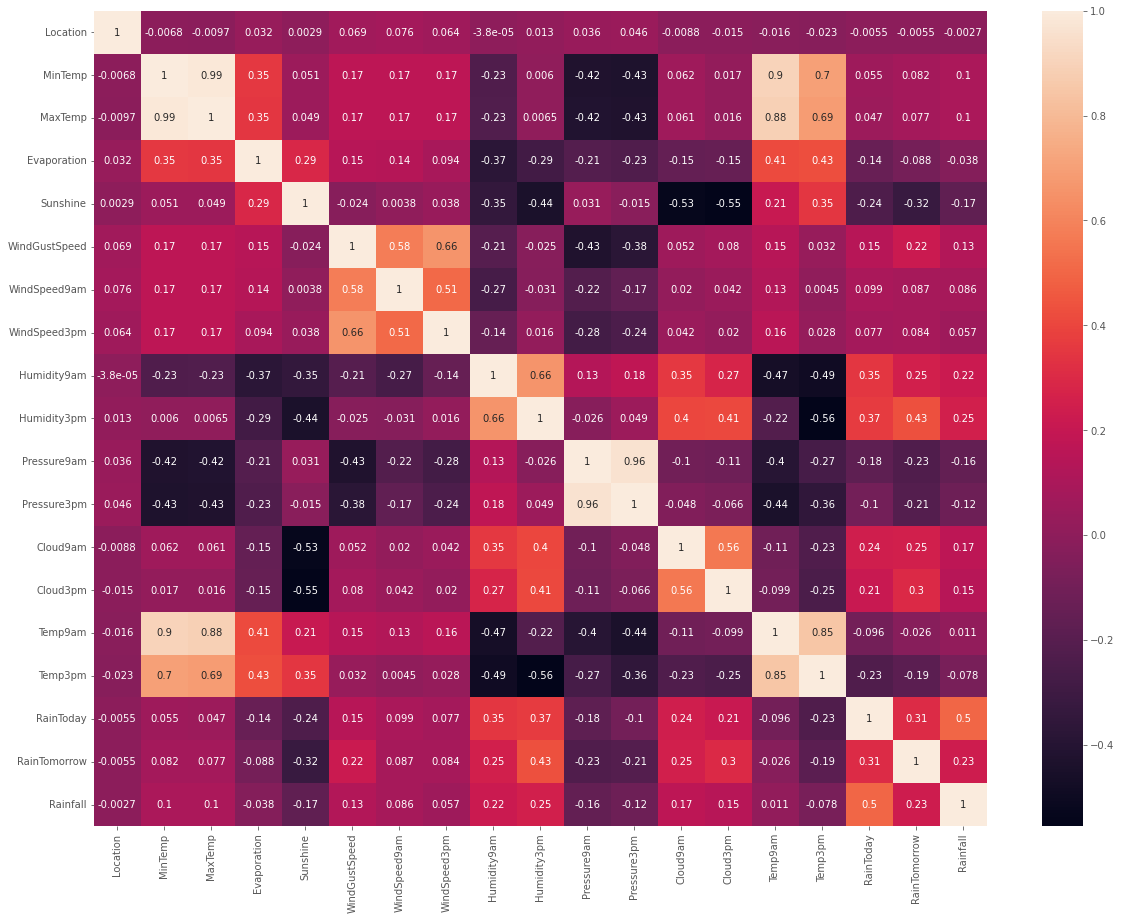

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot=True)

Variabel yang memiliki korelasi yang erat dengan RainTomorrow adalah :
1. MinTemp dan Temp9am sangat berkorelasi.
2. MinTemp dan Temp3pm sangat berkorelasi.
3. MaxTemp dan Temp9am sangat berkorelasi.
4. MaxTemp dan Temp3pm sangat berkorelasi.
5. Temp3pm dan Temp9am sangat berkorelasi.
6. Humidity9am dan Humidity3pm sangat berkorelasi.

In [38]:
data2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall
0,2,13.4,13.4,5.468232,7.611178,W,44.00000,W,WNW,20.0,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,0.6
1,2,7.4,7.4,5.468232,7.611178,WNW,44.00000,NNW,WSW,4.0,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,0.0
2,2,12.9,12.9,5.468232,7.611178,WSW,46.00000,W,WSW,19.0,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,0.0
3,2,9.2,9.2,5.468232,7.611178,NE,24.00000,SE,E,11.0,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,0.0
4,2,17.5,17.5,5.468232,7.611178,W,41.00000,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,2.8,5.468232,7.611178,E,31.00000,SE,ENE,13.0,...,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,0.0
145456,41,3.6,3.6,5.468232,7.611178,NNW,22.00000,SE,N,13.0,...,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,0.0
145457,41,5.4,5.4,5.468232,7.611178,N,37.00000,SE,WNW,9.0,...,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,0.0
145458,41,7.8,7.8,5.468232,7.611178,SE,28.00000,SSE,N,13.0,...,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,0.0


In [39]:
data2 =data2.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
data2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Rainfall
0,2,13.4,13.4,5.468232,7.611178,W,44.00000,W,WNW,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0,0,0.6
1,2,7.4,7.4,5.468232,7.611178,WNW,44.00000,NNW,WSW,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0,0,0.0
2,2,12.9,12.9,5.468232,7.611178,WSW,46.00000,W,WSW,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0,0,0.0
3,2,9.2,9.2,5.468232,7.611178,NE,24.00000,SE,E,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0,0,0.0
4,2,17.5,17.5,5.468232,7.611178,W,41.00000,ENE,NW,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,2.8,5.468232,7.611178,E,31.00000,SE,ENE,13.0,11.0,24.0,1024.6,1020.3,4.447461,4.50993,0,0,0.0
145456,41,3.6,3.6,5.468232,7.611178,NNW,22.00000,SE,N,13.0,9.0,21.0,1023.5,1019.1,4.447461,4.50993,0,0,0.0
145457,41,5.4,5.4,5.468232,7.611178,N,37.00000,SE,WNW,9.0,9.0,24.0,1021.0,1016.8,4.447461,4.50993,0,0,0.0
145458,41,7.8,7.8,5.468232,7.611178,SE,28.00000,SSE,N,13.0,7.0,24.0,1019.4,1016.5,3.000000,2.00000,0,0,0.0


## Data Preprocessing

### Label Encoding and One-hot Encoding

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  object 
 8   WindDir3pm     145460 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Cloud9am       145460 non-null  float64
 15  Cloud3pm       145460 non-null  float64
 16  RainToday      145460 non-null  int64  
 17  RainTomorrow   145460 non-nul

In [41]:
data2

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Rainfall
0,2,13.4,13.4,5.468232,7.611178,W,44.00000,W,WNW,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0,0,0.6
1,2,7.4,7.4,5.468232,7.611178,WNW,44.00000,NNW,WSW,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0,0,0.0
2,2,12.9,12.9,5.468232,7.611178,WSW,46.00000,W,WSW,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0,0,0.0
3,2,9.2,9.2,5.468232,7.611178,NE,24.00000,SE,E,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0,0,0.0
4,2,17.5,17.5,5.468232,7.611178,W,41.00000,ENE,NW,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,2.8,5.468232,7.611178,E,31.00000,SE,ENE,13.0,11.0,24.0,1024.6,1020.3,4.447461,4.50993,0,0,0.0
145456,41,3.6,3.6,5.468232,7.611178,NNW,22.00000,SE,N,13.0,9.0,21.0,1023.5,1019.1,4.447461,4.50993,0,0,0.0
145457,41,5.4,5.4,5.468232,7.611178,N,37.00000,SE,WNW,9.0,9.0,24.0,1021.0,1016.8,4.447461,4.50993,0,0,0.0
145458,41,7.8,7.8,5.468232,7.611178,SE,28.00000,SSE,N,13.0,7.0,24.0,1019.4,1016.5,3.000000,2.00000,0,0,0.0


In [42]:
num_ohc_cols = (data2[data2.columns[data2.dtypes =='object']]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

In [43]:
num_ohc_cols.index

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [47]:
# Encoder
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    # Tipe data string diubah menjadi tipe data integer
    dat = le.fit_transform(data2[col]).astype(int)
    
    # Melalukan one hot encoding yang nantinya akan mengembalikan nilai array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Membuat nama kolom yang unik
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Membuat dataframe baru
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data2.index, 
                          columns=col_names)
    
    # Menambahkan data baru ke dataframe
    data2 = pd.concat([data2, new_df], axis=1)
    
    # Menghapus kolom original dari dataframe
    data2 = data2.drop(col, axis=1)

In [48]:
data3

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Rainfall
0,2,13.4,13.4,5.468232,7.611178,W,44.00000,W,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0,0,0.6
1,2,7.4,7.4,5.468232,7.611178,WNW,44.00000,NNW,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0,0,0.0
2,2,12.9,12.9,5.468232,7.611178,WSW,46.00000,W,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0,0,0.0
3,2,9.2,9.2,5.468232,7.611178,NE,24.00000,SE,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0,0,0.0
4,2,17.5,17.5,5.468232,7.611178,W,41.00000,ENE,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,2.8,5.468232,7.611178,E,31.00000,SE,13.0,11.0,24.0,1024.6,1020.3,4.447461,4.50993,0,0,0.0
145456,41,3.6,3.6,5.468232,7.611178,NNW,22.00000,SE,13.0,9.0,21.0,1023.5,1019.1,4.447461,4.50993,0,0,0.0
145457,41,5.4,5.4,5.468232,7.611178,N,37.00000,SE,9.0,9.0,24.0,1021.0,1016.8,4.447461,4.50993,0,0,0.0
145458,41,7.8,7.8,5.468232,7.611178,SE,28.00000,SSE,13.0,7.0,24.0,1019.4,1016.5,3.000000,2.00000,0,0,0.0


### Split Data

In [52]:
x = data3.drop(['RainTomorrow'], axis = 1) 
y = data3.loc[:,'RainTommorrow']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=33, shuffle =True)# Membagi data menjadi dua

KeyError: 'RainTommorrow'

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 30% dan ukuran data training adalah 70%  yang diambil secara acak dengan nomor generator 1. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

Menampilkan variabel X.

In [50]:
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,...,WindDir3pm_6,WindDir3pm_7,WindDir3pm_8,WindDir3pm_9,WindDir3pm_10,WindDir3pm_11,WindDir3pm_12,WindDir3pm_13,WindDir3pm_14,WindDir3pm_15
0,2,13.4,13.4,5.468232,7.611178,44.00000,20.0,24.0,22.0,1007.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,7.4,7.4,5.468232,7.611178,44.00000,4.0,22.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,12.9,12.9,5.468232,7.611178,46.00000,19.0,26.0,30.0,1007.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,9.2,9.2,5.468232,7.611178,24.00000,11.0,9.0,16.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,17.5,17.5,5.468232,7.611178,41.00000,7.0,20.0,33.0,1010.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,2.8,5.468232,7.611178,31.00000,13.0,11.0,24.0,1024.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,41,3.6,3.6,5.468232,7.611178,22.00000,13.0,9.0,21.0,1023.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,41,5.4,5.4,5.468232,7.611178,37.00000,9.0,9.0,24.0,1021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145458,41,7.8,7.8,5.468232,7.611178,28.00000,13.0,7.0,24.0,1019.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menampilkan variabel Y.

In [51]:
y

NameError: name 'y' is not defined

## Model Definition

## Model Training

### Logistic Regression

#### Create a model and fit it

In [72]:
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

NameError: name 'x_train' is not defined

#### Get results

In [73]:
print('train score : ', lrmodel.score(x_train, y_train))
print('test score : ', lrmodel.score(x_test, y_test))

NameError: name 'x_train' is not defined

### Support Vector Machine

#### Create a model and fit it

In [74]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

#### Get results

In [75]:
print('train score : ', svc_model.score(x_train, y_train))
print('test score : ', svc_model.score(x_test, y_test))

NameError: name 'x_train' is not defined

## Model Evaluation & Inference

### Logistic Regression

In [177]:
lr_pred = lrmodel.predict(x_test)
print('predicted response: ', lr_pred, sep='\n')

predicted response: 
[1.65234852 3.83339596 2.3632431  ... 2.45141888 1.87401485 3.27415943]


### Support Vector Machine

In [178]:
svc_pred = svc_model.predict(x_test)
print('predicted response: ', svc_pred, sep='\n')

predicted response: 
[1.79343908 3.88738    2.37456303 ... 2.41887613 1.96853163 3.32124571]


## Kesimpulan